In [1]:

from dom import *
#from pylab import *
import matplotlib.pyplot as plt
import numpy as np


# loss functions

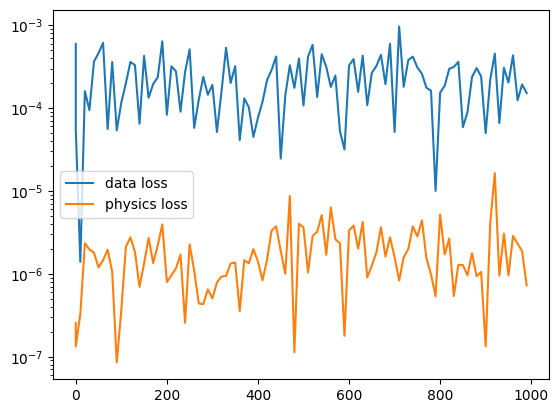

In [2]:
#pred = txtload('predicted.npy')
#vx = abrirbin('../hit_base/odir/vx.0006.out', 32)

ep, lu, lf = txtload('output.dat') # it is np.loadtxt in dom.py
plt.figure()
plt.semilogy(ep, lu , label = 'data loss')
plt.semilogy(ep, lf , label = 'physics loss')
plt.legend()


# Validation 

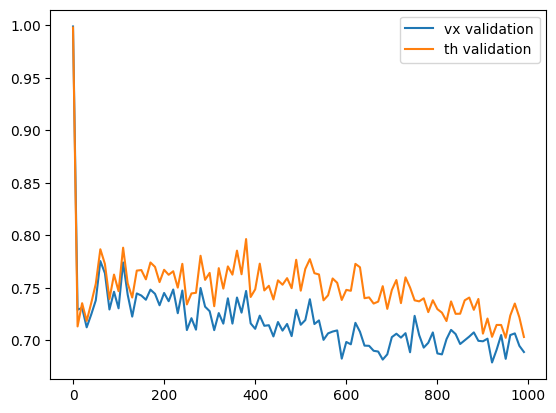

In [4]:
ep, err_vx, err_vy, err_th = txtload('validation.dat')
plt.figure()
plt.plot(ep, err_vx , label = 'vx validation')
plt.plot(ep, err_th , label = 'th validation')
plt.legend()


# predicted fields

In [5]:
pred = np.load('predicted.npy')
pred.shape


(4, 1024, 1024)

In [7]:
u_p, v_p, th_p, hb_p = pred
hb_p.shape


(1024, 1024)

## predicted vx

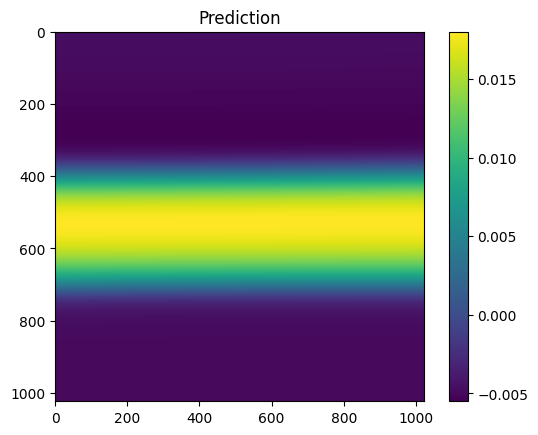

In [9]:
plt.figure()
plt.imshow(u_p[:,:])
plt.title('Prediction')
plt.colorbar()


### real  space sampling

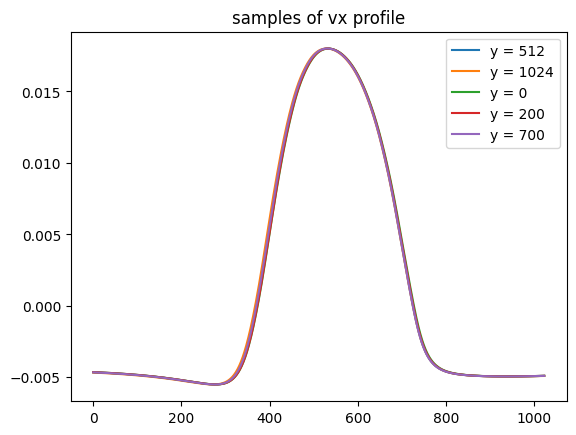

In [10]:
plt.figure()
plt.title('samples of vx profile')
plt.plot(pred[0][:,512] , label = 'y = 512')
plt.plot(pred[0][:,-1] , label = 'y = 1024')
plt.plot(pred[0][:,0] , label = 'y = 0')
plt.plot(pred[0][:,200] , label = 'y = 200')
plt.plot(pred[0][:,700] , label = 'y = 700')

plt.legend()


### Fourier

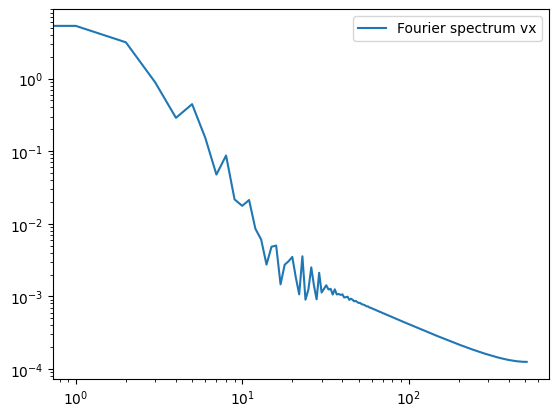

In [11]:
f0 = np.abs(np.fft.rfft(pred[0][:,512]))

plt.loglog(f0, label ='Fourier spectrum vx')
plt.legend()


## predicted th

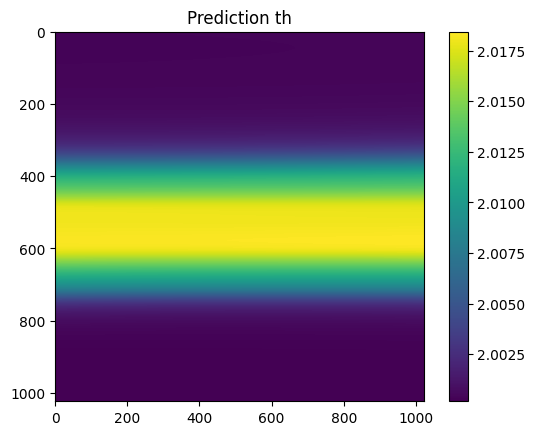

In [12]:
plt.figure()
plt.imshow(pred[2][:,:])
plt.title('Prediction th')
plt.colorbar()


### real space sampling

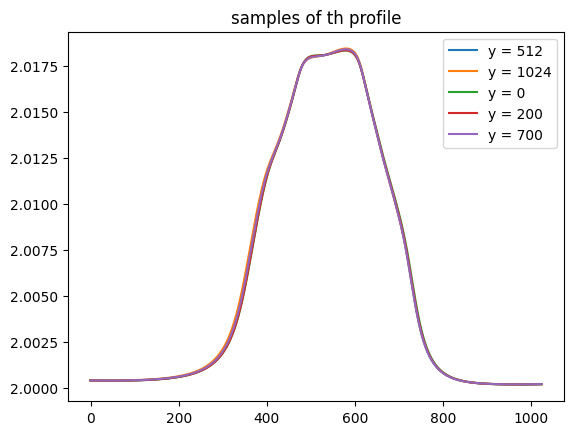

In [13]:
plt.figure()
plt.title('samples of th profile')
plt.plot(pred[2][:,512] , label = 'y = 512')
plt.plot(pred[2][:,-1] , label = 'y = 1024')
plt.plot(pred[2][:,0] , label = 'y = 0')
plt.plot(pred[2][:,200] , label = 'y = 200')
plt.plot(pred[2][:,700] , label = 'y = 700')

plt.legend()


### Fourier

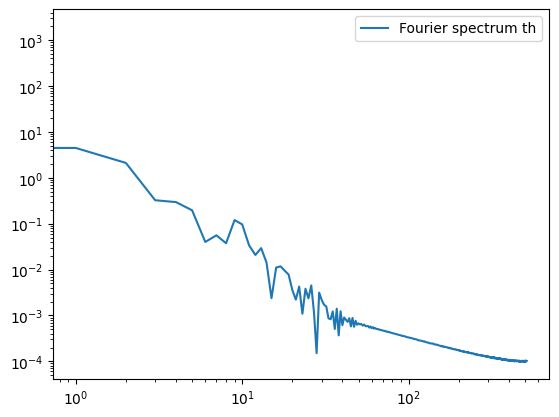

In [14]:
thf0 = np.abs(np.fft.rfft(pred[2][:,512]))

plt.loglog(thf0, label ='Fourier spectrum th')
plt.legend()


## predicted hb

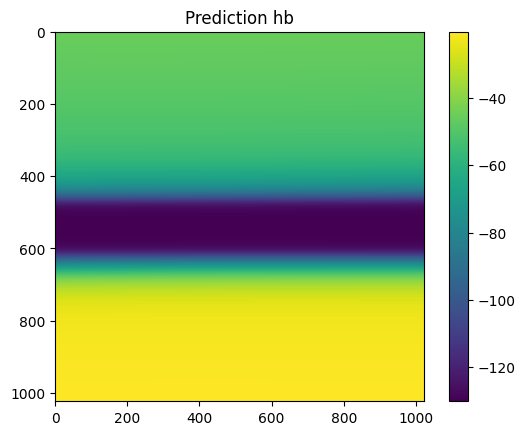

In [26]:
plt.figure()
plt.imshow(pred[3][:,:])
plt.title('Prediction hb')
plt.colorbar()


### real space sampling

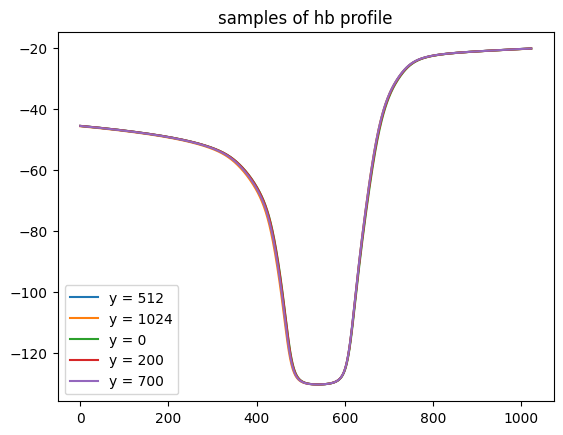

In [27]:
plt.figure()
plt.title('samples of hb profile')
plt.plot(pred[3][:,512] , label = 'y = 512')
plt.plot(pred[3][:,-1] , label = 'y = 1024')
plt.plot(pred[3][:,0] , label = 'y = 0')
plt.plot(pred[3][:,200] , label = 'y = 200')
plt.plot(pred[3][:,700] , label = 'y = 700')

plt.legend()


### Fourier

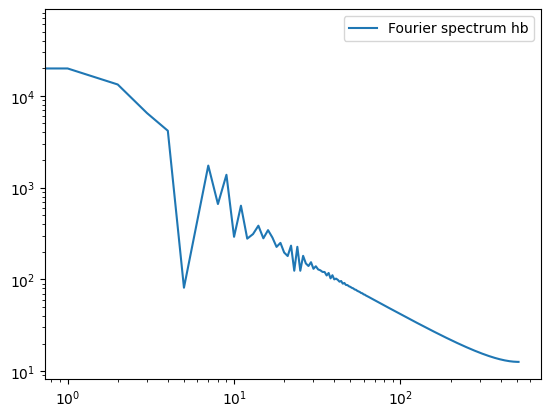

In [28]:
fhb = np.abs(np.fft.rfft(pred[3][:,512]))

plt.loglog(fhb, label ='Fourier spectrum hb')
plt.legend()


# Comparing to simulations

In [40]:
# Get parameters
params = Run()

tidx = 5 # depends on which has been used in cte_validation in run_pinn.py
path = '../../gauss_topo/gauss_topo011/outs' # depends on the path to wanted outs
ref = np.array([abrirbin(f'{path}/{comp}.{tidx+1:03}.out', params.N)
                       for comp in ['vx', 'vy', 'th','fs']])

vx = ref[0]
vy = ref[1]
th = ref[2]
fs = ref[3]


## Comparing vx

Text(0.5, 1.0, 'dif')

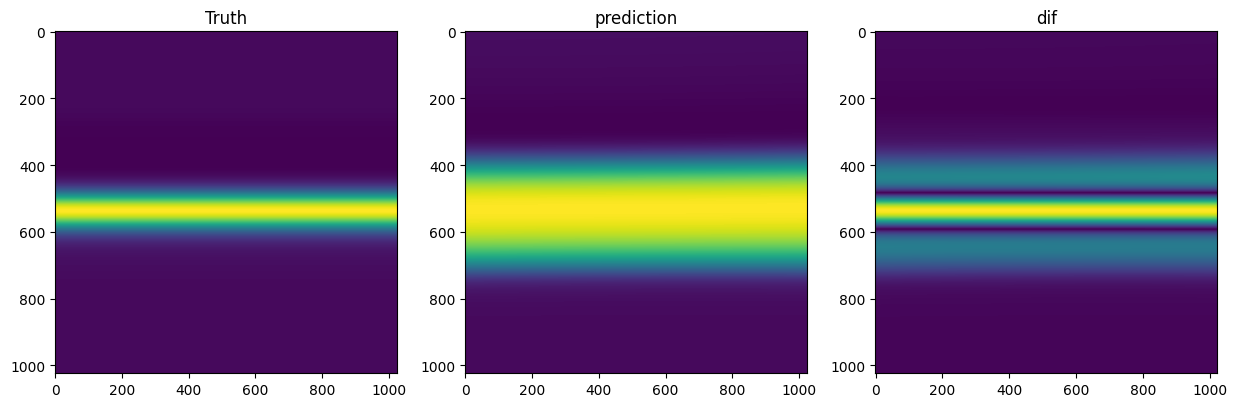

In [30]:
f, ax = plt.subplots(nrows=1 , ncols=3 ,figsize=(15, 5))

ax[0].imshow(vx[:,:])
ax[0].set_title('Truth')
#ax[0].colorbar()

ax[1].imshow(pred[0][:,:])
ax[1].set_title('prediction')
#ax[0].colorbar()

ax[2].imshow(abs(pred[0][:,:]-vx[:,:]))
ax[2].set_title('dif')
#ax[1].colorbar()


### real space sampling

Text(0.5, 1.0, 'predicted - true')

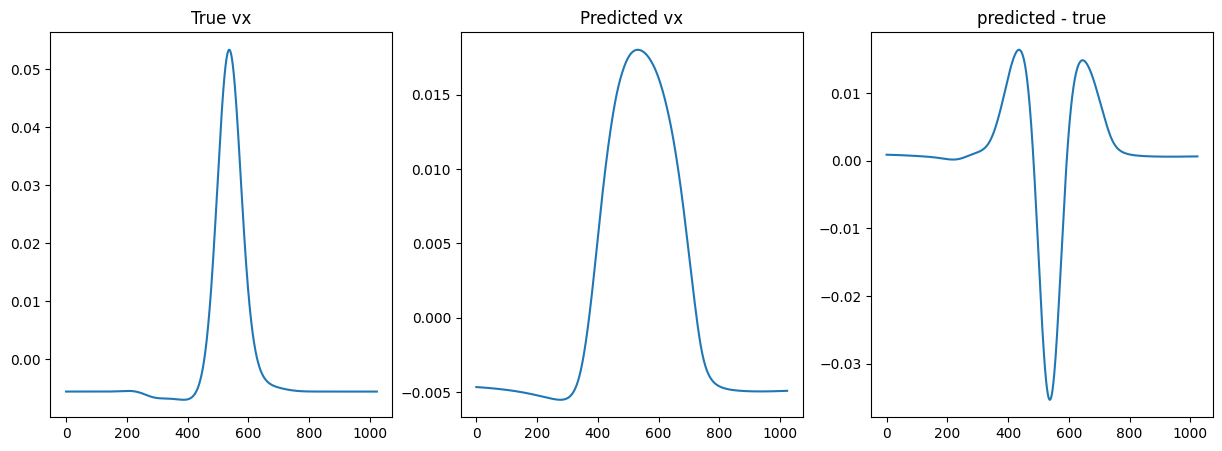

In [31]:
f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.plot(vx[:,512])
ax0.set_title('True vx')

ax1.plot(pred[0][:,512] , label = 'y = 512')
ax1.set_title('Predicted vx')

ax2.plot(pred[0][:,512] - vx[:,512])
ax2.set_title('predicted - true')


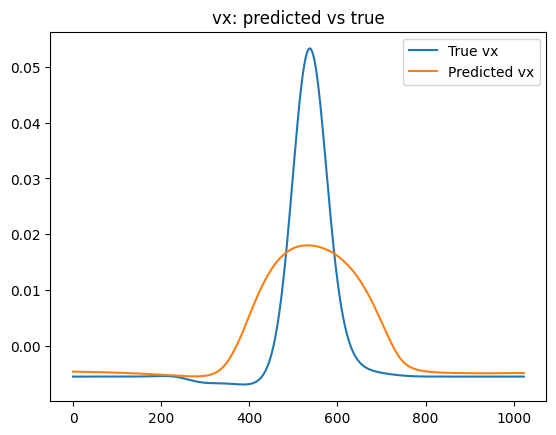

In [32]:
plt.figure()
plt.title('vx: predicted vs true')
plt.plot(vx[:,512] , label = 'True vx')
plt.plot(pred[0][:,512] , label = 'Predicted vx')
plt.legend()


### Fourier 

Text(0.5, 1.0, 'Fpredicted - Ftrue')

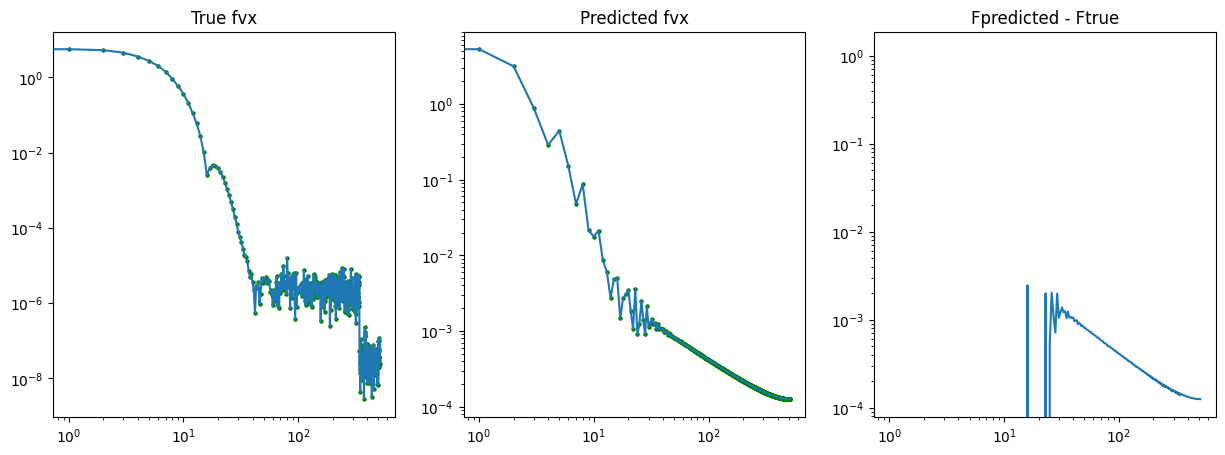

In [33]:
fvx_p = np.abs(np.fft.rfft(pred[0][:,512]))
fvx = np.abs(np.fft.rfft(vx[:,512]))


f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.loglog(fvx)
ax0.scatter(np.arange(0 , len(fvx)) , fvx  , alpha = 1 , color = 'green' , s = 5)
ax0.set_yscale('log')
ax0.set_xscale('log')

ax0.set_title('True fvx')

ax1.loglog(fvx_p , label = 'y = 512')
ax1.scatter(np.arange(0 , len(fvx)), fvx_p , label = 'y = 512' , alpha = 1 , color = 'green' , s = 5 )
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Predicted fvx')

ax2.loglog(fvx_p - fvx)
ax2.set_title('Fpredicted - Ftrue')


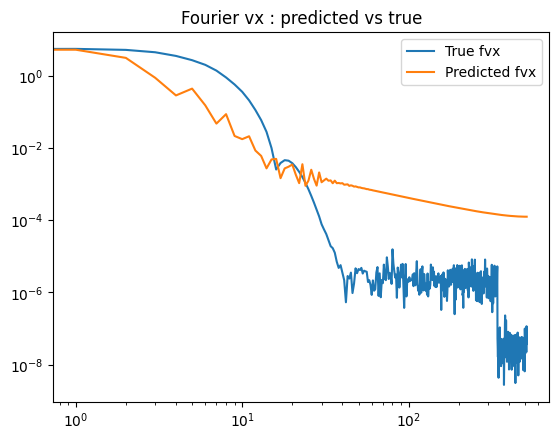

In [34]:
plt.figure()
plt.title('Fourier vx : predicted vs true')
plt.loglog(fvx, label = 'True fvx')
plt.loglog(fvx_p, label = 'Predicted fvx')
plt.legend()


## Comparing th

Text(0.5, 1.0, 'dif')

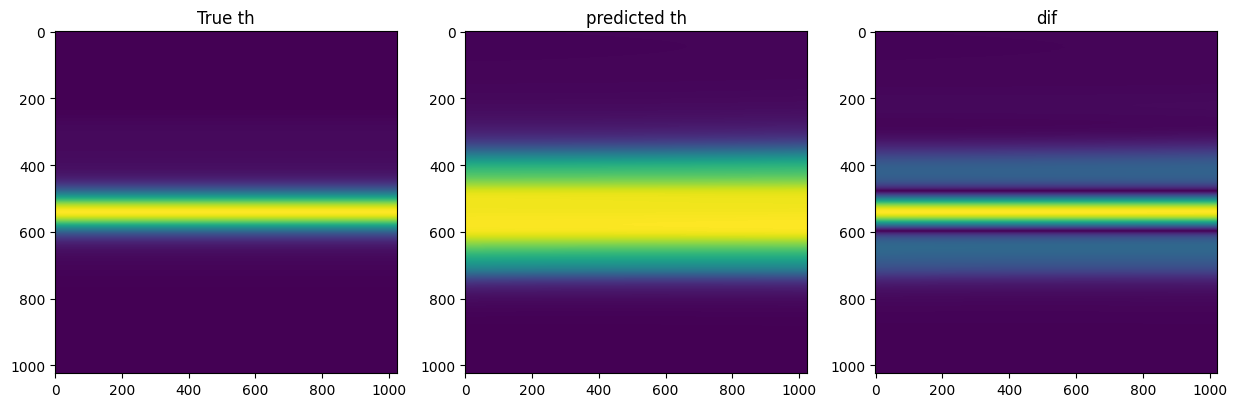

In [35]:
f, ax = plt.subplots(nrows=1 , ncols=3 ,figsize=(15, 5))

ax[0].imshow(th[:,:])
ax[0].set_title('True th')
#ax[0].colorbar()

ax[1].imshow(pred[2][:,:])
ax[1].set_title('predicted th')
#ax[0].colorbar()

ax[2].imshow(abs(pred[2][:,:]-th[:,:]))
ax[2].set_title('dif')
#ax[1].colorbar()


### real space sampling

Text(0.5, 1.0, 'predicted - true')

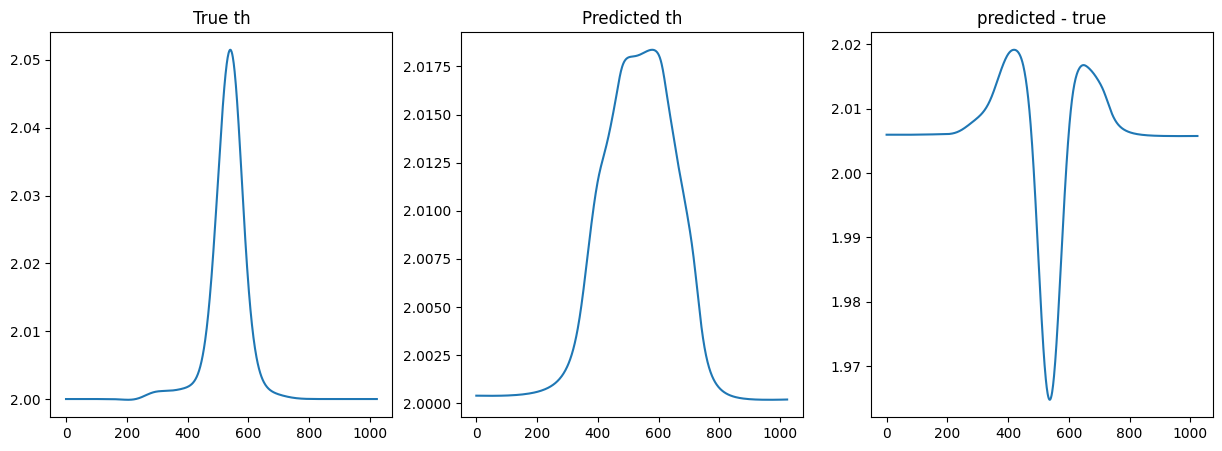

In [36]:
f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.plot(th[:,512])
ax0.set_title('True th')

ax1.plot(pred[2][:,512] , label = 'y = 512')
ax1.set_title('Predicted th')

ax2.plot(pred[2][:,512] - vx[:,512])
ax2.set_title('predicted - true')


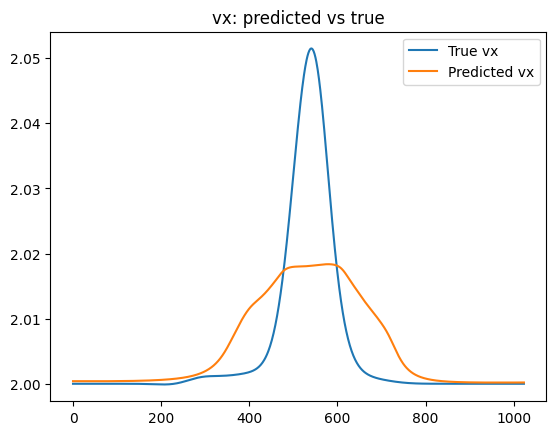

In [37]:
plt.figure()
plt.title('vx: predicted vs true')
plt.plot(th[:,512] , label = 'True vx')
plt.plot(pred[2][:,512] , label = 'Predicted vx')
plt.legend()


### Fourier

Text(0.5, 1.0, 'Fpredicted - Ftrue')

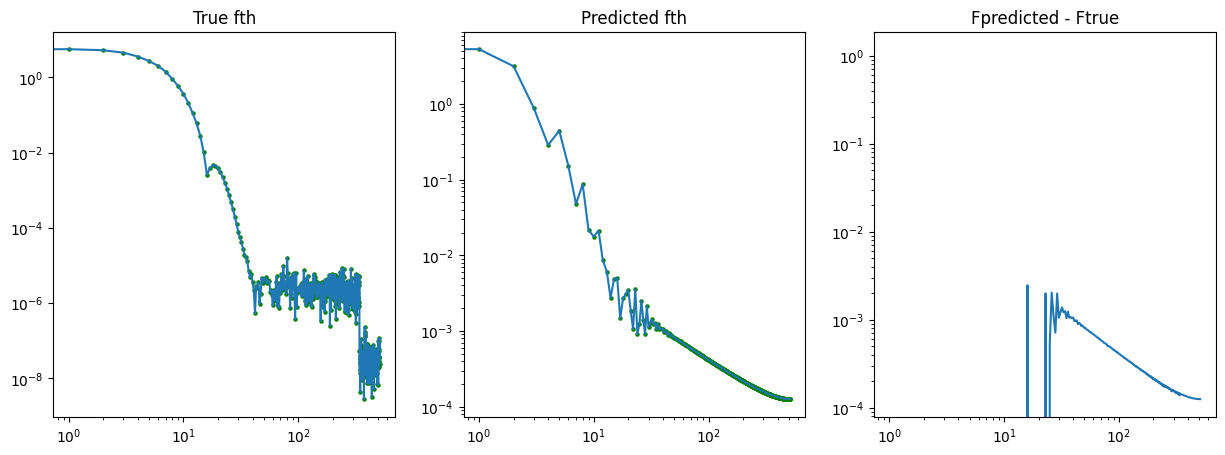

In [38]:
fth_p = np.abs(np.fft.rfft(pred[2][:,512]))
fth = np.abs(np.fft.rfft(th[:,512]))


f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.loglog(fvx)
ax0.scatter(np.arange(0 , len(fvx)) , fvx  , alpha = 1 , color = 'green' , s = 5)
ax0.set_yscale('log')
ax0.set_xscale('log')

ax0.set_title('True fth')

ax1.loglog(fvx_p , label = 'y = 512')
ax1.scatter(np.arange(0 , len(fvx)), fvx_p , label = 'y = 512' , alpha = 1 , color = 'green' , s = 5 )
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Predicted fth')

ax2.loglog(fvx_p - fvx)
ax2.set_title('Fpredicted - Ftrue')


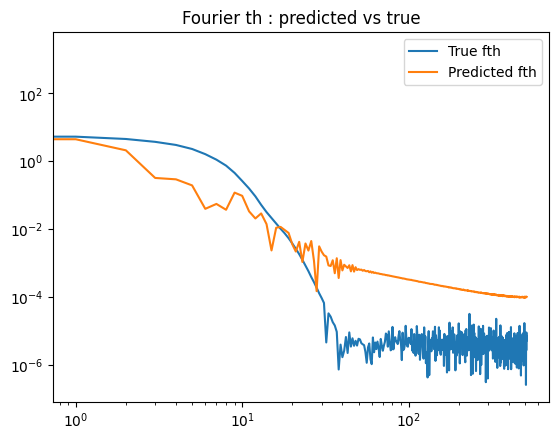

In [49]:
plt.figure()
plt.title('Fourier th : predicted vs true')
plt.loglog(fth, label = 'True fth')
plt.loglog(fth_p, label = 'Predicted fth')
plt.legend()


## compare hb

Text(0.5, 1.0, 'dif')

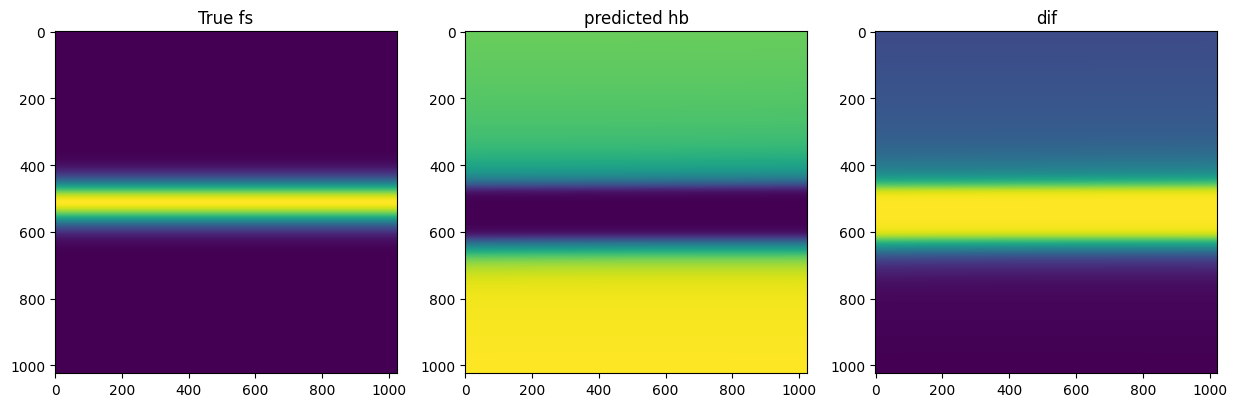

In [44]:
f, ax = plt.subplots(nrows=1 , ncols=3 ,figsize=(15, 5))

ax[0].imshow(fs[:,:])
ax[0].set_title('True fs')
#ax[0].colorbar()

ax[1].imshow(pred[3][:,:])
ax[1].set_title('predicted hb')
#ax[0].colorbar()

ax[2].imshow(abs(pred[3][:,:]-fs[:,:]))
ax[2].set_title('dif')
#ax[1].colorbar()


### real space sampling

Text(0.5, 1.0, 'predicted - true')

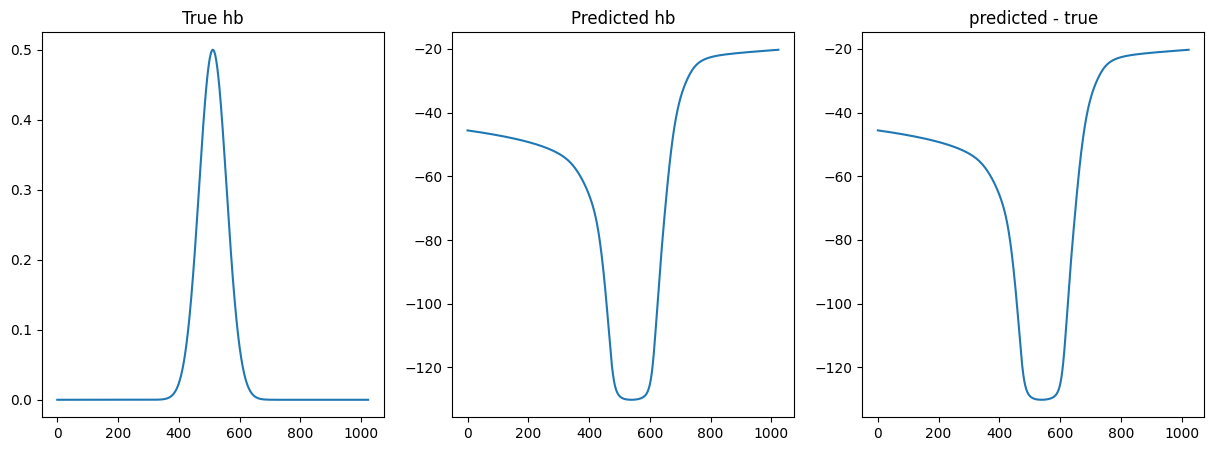

In [42]:
f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.plot(fs[:,512])
ax0.set_title('True hb')

ax1.plot(pred[3][:,512] , label = 'y = 512')
ax1.set_title('Predicted hb')

ax2.plot(pred[3][:,512] - vx[:,512])
ax2.set_title('predicted - true')


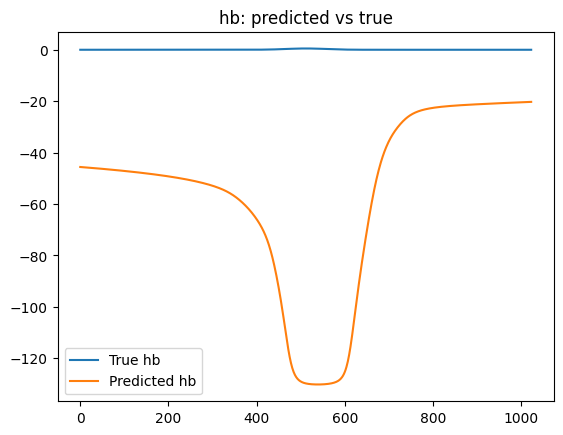

In [48]:
plt.figure()
plt.title('hb: predicted vs true')
plt.plot(fs[:,512] , label = 'True hb')
plt.plot(pred[3][:,512] , label = 'Predicted hb')
plt.legend()


### Fourier

Text(0.5, 1.0, 'Fpredicted - Ftrue')

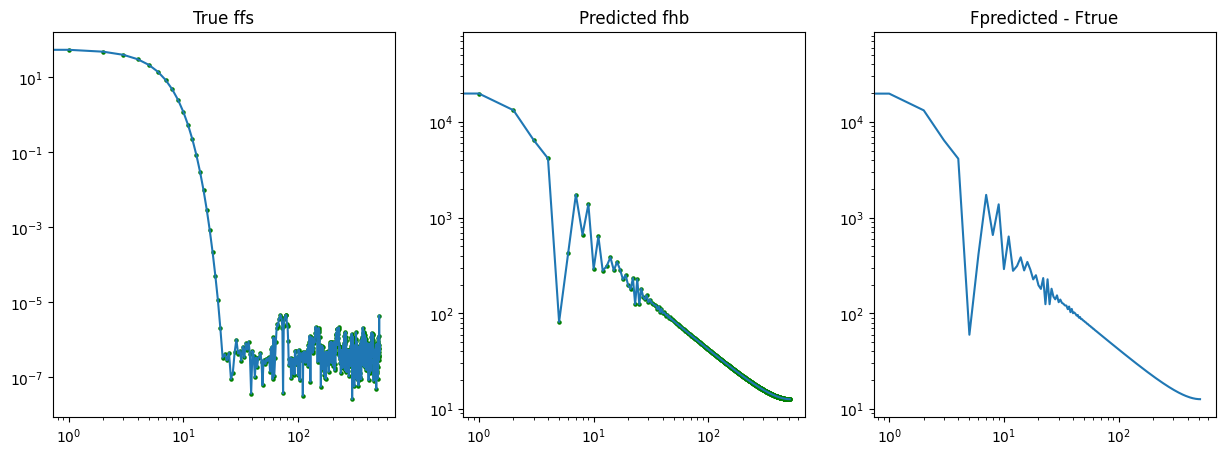

In [45]:
fhb_p = np.abs(np.fft.rfft(pred[3][:,512]))
ffs = np.abs(np.fft.rfft(fs[:,512]))


f , ax = plt.subplots(nrows=1 , ncols=3 , figsize = (15,5))
ax0, ax1, ax2 = ax

ax0.loglog(ffs)
ax0.scatter(np.arange(0 , len(ffs)) , ffs  , alpha = 1 , color = 'green' , s = 5)
ax0.set_yscale('log')
ax0.set_xscale('log')

ax0.set_title('True ffs')

ax1.loglog(fhb_p , label = 'y = 512')
ax1.scatter(np.arange(0 , len(fhb_p)), fhb_p , label = 'y = 512' , alpha = 1 , color = 'green' , s = 5 )
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_title('Predicted fhb')

ax2.loglog(fhb_p - ffs)
ax2.set_title('Fpredicted - Ftrue')


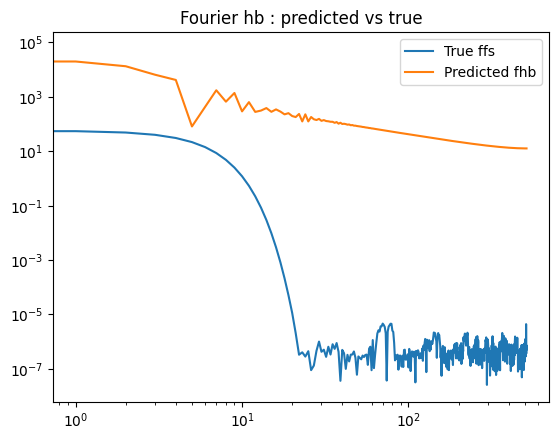

In [47]:
plt.figure()
plt.title('Fourier hb : predicted vs true')
plt.loglog(ffs, label = 'True ffs')
plt.loglog(fhb_p, label = 'Predicted fhb')
plt.legend()
